In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/Users/jessi/Downloads/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# PREPROCESSING 

In [12]:
df.drop(['id', 'date', 'sqft_living','sqft_basement'],axis=1, inplace=True)

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# VISUALISATION


<AxesSubplot:xlabel='price', ylabel='Count'>

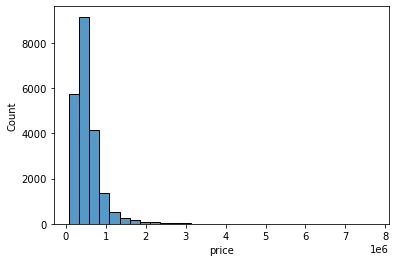

In [11]:
sns.histplot(data=df, x='price', bins= 30)

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

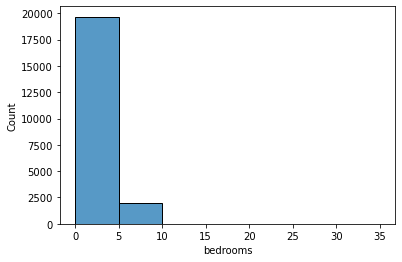

In [14]:
sns.histplot(data=df, x='bedrooms', binwidth= 5)

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

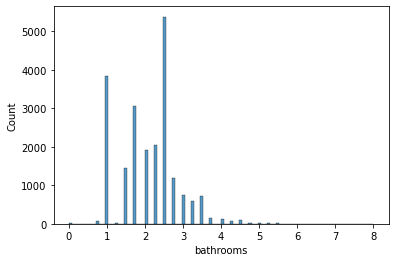

In [17]:
sns.histplot(data=df, x='bathrooms', bins= 100)

In [63]:
x=df['sqft_lot'].values.reshape(-1,1)
y=df['price']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=741)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model=LinearRegression()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
model.score(x_test,y_test)

0.004950346595348543

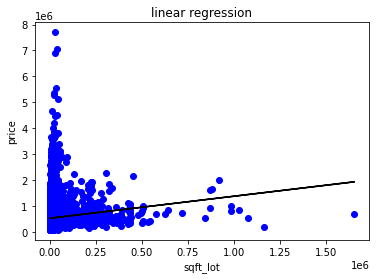

In [65]:
plt.scatter(x,y,color="b")
plt.title("linear regression")
plt.ylabel("price")
plt.xlabel("sqft_lot")
plt.plot(x,model.predict(x),color="k")
plt.show()


In [55]:
x=df.drop('price',axis=1)
y=df['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=741)

multi_lin_reg=LinearRegression()
multi_lin_reg.fit(x_train,y_train)
multi_lin_reg.score(x_test,y_test)

0.679298886234517

In [59]:
from sklearn.preprocessing import PolynomialFeatures
x=df.drop('price',axis=1)
y=df["price"].values


poly_reg= LinearRegression()
poly=PolynomialFeatures(degree=2)
x=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=741)
poly_reg.fit(x_train,y_train)
poly_reg.score(x_test,y_test)



0.7898990227965756